# GENERATE CHIMERA SESSIONS FROM P2RANK OUTPUT

This notebook is to generate Chimera sessions (.py) to visualise the output of the ligand binding site prediction software P2RANK.

## IMPORTING PACKAGES

In [9]:
import os
import re
import pandas as pd
from IPython.display import Image

## FUNCTIONS

In [2]:
# Define a list of colors for coloring different pockets
colors = ["red", "blue", "green", "yellow", "orange", "purple", "cyan", "magenta", "lime", "pink"] # replace by your colour palette

def generate_chimera_script(table, colors):
    """
    This function generates a set of Chimera commands to
    format the viewer, as well as define, colour and draw
    surfaces of pockets predicted by P2RANK.
    
    table: path to P2RANK predictions table.
    colors: list of colours to use for the pockets.
    """

    # Read the table
    df = pd.read_csv(table)
    
    df.columns = [
        'name', 'rank', 'score', 'probability', 'sas_points',
        'surf_atoms', 'center_x', 'center_y', 'center_z',
        'residue_ids', 'surf_atom_ids'
    ]

    # Convert the DataFrame to a dictionary with 'name' as keys and 'residue_ids' as values
    pockets_dict = df.set_index('name')['residue_ids'].to_dict()
    
    # Initialise the script
    chimera_script = ""
    
    # Some formatting
    chimera_script += "background solid white\n"
    chimera_script += "ksdssp\n"
    #chimera_script += "set silhouette\n"
    chimera_script += "color white\n\n"

    for index, (pocket_name, residue_ids) in enumerate(pockets_dict.items()):
        # Format residue IDs for Chimera (e.g., "A_104" to "104.A")
        formatted_residues = [residue.split('_')[1] + '.' + residue.split('_')[0] for residue in residue_ids.split()]

        # Select a color for this pocket
        color = colors[index % len(colors)]
        
        # Removing white space after pocket name
        pocket_name = pocket_name.strip()

        # Generate Chimera commands
        chimera_script += f"# {pocket_name}\n"
        chimera_script += f"select :{','.join(formatted_residues)}\n"
        chimera_script += f"namesel {pocket_name}\n"
        chimera_script += f"color {color} sel\n"
        chimera_script += f"surfcat surf{pocket_name} {pocket_name}\n"
        chimera_script += f"surf surf{pocket_name}\n\n"

    return chimera_script

def generate_chimera_commands(pdb_path, pocket_commands, session_path, chimera_script_path):
    """
    Generates Chimera commands file, that will then be passed to Chimera
    when it is executed on the command line. These will need to be interpreted
    in Python first.
    """
    with open(chimera_script_path, 'w') as file:
        file.write(f'open {pdb_path}\n\n')  # Enclose the path in quotes
        file.write(pocket_commands)  # Enclose the path in quotes
        file.write(f'save {session_path}\n')  # Enclose the path in quotes
        file.write("stop\n")

## READING INPUT DATA

In [3]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, "input")

## 5 EXAMPLES OF P2RANK PREDICTIONS ON AF MODELS

In [4]:
outs = os.listdir(data_dir) # 5 examples of P2RANK predictions on Human AF models
print(outs)

['predict_AF-A0A0X1KG70-F1-model_v4', 'predict_AF-P22695-F1-model_v4', 'predict_AF-Q02224-F5-model_v4', 'predict_AF-Q8TF65-F1-model_v4', 'predict_AF-U3KPV4-F1-model_v4']


## P2RANK OUTPUT

In [102]:
out_path = os.path.join(data_dir, outs[0]) # predict_AF-A0A0X1KG70-F1-model_v4
fs = os.listdir(out_path)
print(fs)
table_path = os.path.join(out_path, fs[0]) # AF-A0A0X1KG70-F1-model_v4.cif_predictions.csv
df = pd.read_csv(table_path) 

['AF-A0A0X1KG70-F1-model_v4.cif_predictions.csv', 'run.log', 'AF-A0A0X1KG70-F1-model_v4.cif_residues.csv', 'params.txt', 'visualizations']


## RENAMING P2RANK PREDICTIONS TABLE COLUMNS

In [23]:
df.columns = [
    'name', 'rank', 'score', 'probability', 'sas_points',
    'surf_atoms', 'center_x', 'center_y', 'center_z',
    'residue_ids', 'surf_atom_ids'
]

In [66]:
df

name         rank     score   probability   sas_points   surf_atoms  \
0  pocket1         1     30.22         0.902           70           56   
1  pocket2         2      6.85         0.295           63           38   
2  pocket3         3      1.33         0.013           11           11   
3  pocket4         4      1.23         0.010           12           15   

      center_x     center_y     center_z  \
0       3.4563      -3.9022      -1.7443   
1     -14.5129      -3.1599      14.3851   
2     -11.8706     -12.5671       9.2074   
3      -8.5713      -4.9078       7.3070   

                                         residue_ids  \
0   A_104 A_105 A_108 A_109 A_112 A_113 A_116 A_1...   
1   A_118 A_121 A_122 A_125 A_126 A_132 A_237 A_2...   
2          A_119 A_120 A_123 A_214 A_217 A_218 A_221   
3                A_115 A_118 A_119 A_245 A_248 A_249   

                                       surf_atom_ids  
0   590 592 841 842 843 845 847 848 852 853 855 8...  
1   451 464 465 466 478 949 950 953 977 984 1008 ...  
2   956 957 958 959 989 1695 1717 1724 1726 1729 ...  
3   928 931 949 953 957 1922 1924 1925 1926 1928 ...

## GETTING CHIMERA COLOURING COMMANDS

In [26]:
print(table_path) # EXAMPLE TABLE

/Users/2394007/Documents/PHD/P2RANK_2_CHIMERA/input/predict_AF-U3KPV4-F1-model_v4/AF-U3KPV4-F1-model_v4.cif_predictions.csv


In [107]:
script = generate_chimera_script(table_path, colors)
print(script)

background solid white
ksdssp
color white

# pocket1
select :104.A,105.A,108.A,109.A,112.A,113.A,116.A,155.A,178.A,179.A,180.A,181.A,202.A,203.A,206.A,207.A,210.A,252.A,253.A,256.A,259.A,260.A,274.A,277.A,73.A
namesel pocket1
color red sel
surfcat surfpocket1 pocket1
surf surfpocket1

# pocket2
select :118.A,121.A,122.A,125.A,126.A,132.A,237.A,238.A,241.A,244.A,245.A,288.A,289.A,292.A,293.A,295.A,57.A,59.A,60.A
namesel pocket2
color blue sel
surfcat surfpocket2 pocket2
surf surfpocket2

# pocket3
select :119.A,120.A,123.A,214.A,217.A,218.A,221.A
namesel pocket3
color green sel
surfcat surfpocket3 pocket3
surf surfpocket3

# pocket4
select :115.A,118.A,119.A,245.A,248.A,249.A
namesel pocket4
color yellow sel
surfcat surfpocket4 pocket4
surf surfpocket4




## GETTING CHIMERA SCRIPT

This script will:
 - Open a PDB/CIF file.
 - Apply some styling commands.
 - Define all pocket selections, name them, colour them and draw and name their surfaces.
 - Save the resulting Chimera session (.py)
 - Close

In [99]:
# Set the paths

pdb_path = "/Users/2394007/Documents/PHD/FOR_KRIVAK/p2rank_data/predict_AF-A0A0X1KG70-F1-model_v4/visualizations/data/AF-A0A0X1KG70-F1-model_v4.cif"

session_path = os.path.join(cwd, "{}_session.py".format("A0A0X1KG70_F1"))

chimera_script_path = os.path.join(cwd, "{}_commands.cmd".format("A0A0X1KG70_F1"))

# Generate the Chimera command file

generate_chimera_commands(pdb_path, script, session_path, chimera_script_path)

## RUNNING CHIMERA

In [100]:
chimera = "/Users/2394007/Desktop/Chimera.app/Contents/MacOS/chimera" # path to your chimera app
translator = os.path.join(cwd, "chimera_run_commands.py")
# Run Chimera
os.system(f"{chimera} --nogui --script {translator} {chimera_script_path}")

You have used an unregistered copy of Chimera for 121 days.
You can either register now by visiting:
   http://www.cgl.ucsf.edu/cgi-bin/chimera_registration.py
or by choosing 'Registration...' from the 'Help' menu next
time you start Chimera with the gui enabled.

Registration is free.  By providing the information requested
you will be helping us document the impact this software is
having in the scientific community. The information you supply
will only be used for reporting summary statistics to NIH.
[MMLIB:WARNING] read_struct_conn: struct_conn table not found


#0, chain A: olfactory receptor 4M2

AF-A0A0X1KG70-F1-model_v4.cif opened
Opened AF-A0A0X1KG70-F1-model_v4.cif containing 1 model, 2488 atoms, and 313 residues
Computing secondary structure assignments for model(s) #0
using ksdssp (Kabsch and Sander Define Secondary Structure
of Proteins) with the parameters:
  energy cutoff <default>
  minimum helix length <default>
  minimum strand length <default>

/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6DLJ70P
Copyright M.F. Sanner (March 2000)
Compilation flags  


Surface AF-A0A0X1KG70-F1-model_v4.cif, category surfpocket1, probe radius 1.4, vertex density 2
  1 connected surface components
  Total solvent excluded surface area = 2327.07
  Total solvent accessible surface area = 2829.54

Surface AF-A0A0X1KG70-F1-model_v4.cif, category surfpocket1 has 1 components
/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6

0

## OUTPUT EXAMPLE

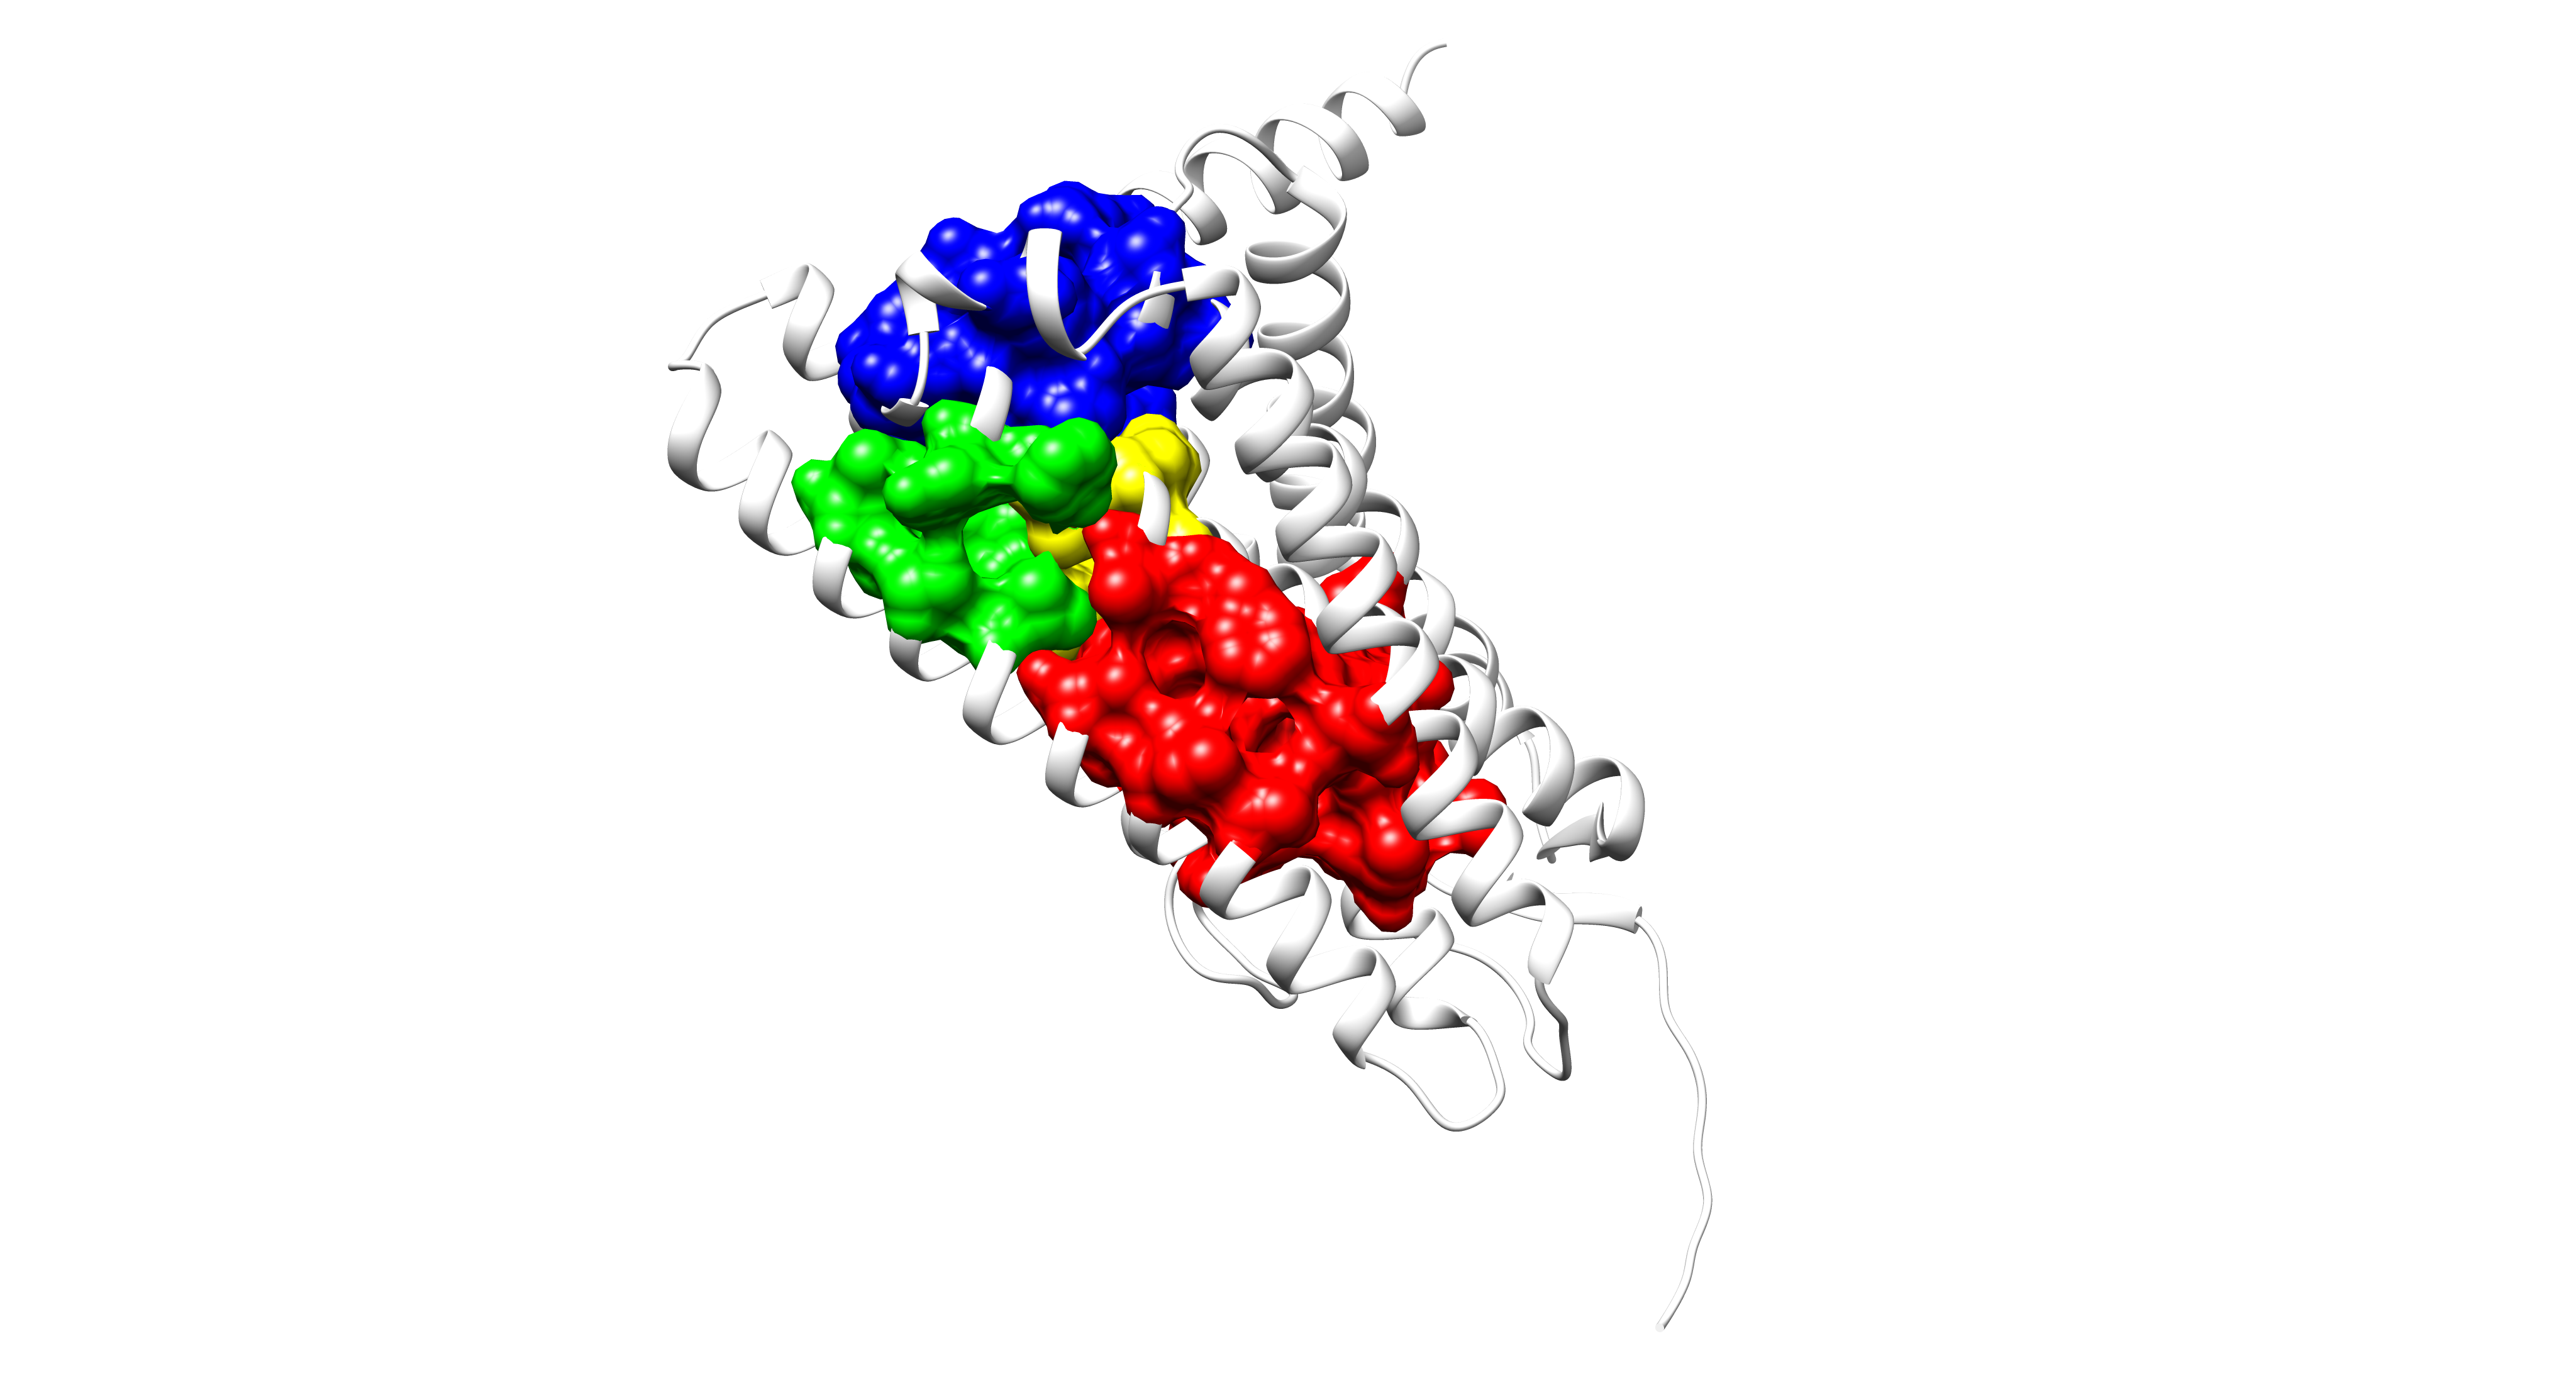

In [25]:
# Display an image by specifying the file path
Image(filename='img/A0A0X1KG70-F1_pred_pockets.png')

## RUNNING IT FOR ALL EXAMPLES

In [14]:
outs

['predict_AF-A0A0X1KG70-F1-model_v4',
 'predict_AF-P22695-F1-model_v4',
 'predict_AF-Q02224-F5-model_v4',
 'predict_AF-Q8TF65-F1-model_v4',
 'predict_AF-U3KPV4-F1-model_v4']

In [21]:
in_dir = os.path.join(cwd, "input")
out_dir = os.path.join(cwd, "output")
cmd_dir = os.path.join(out_dir, "commands")
session_dir = os.path.join(out_dir, "sessions")

chimera = "/Users/2394007/Desktop/Chimera.app/Contents/MacOS/chimera" # path to your Chimera app
translator = os.path.join(cwd, "chimera_run_commands.py")

for out in outs:
    out_path = os.path.join(data_dir, out) 
    fs = os.listdir(out_path)
    pred_file = [f for f in fs if f.endswith("_predictions.csv")][0]
    _, prot_id, frag_id, _ = pred_file.split("-")
    model_id = "{}-{}".format(prot_id, frag_id)
    
    table_path = os.path.join(out_path, pred_file)
    
    script = generate_chimera_script(table_path, colors)
    
    pdb_path = os.path.join(in_dir, out, "visualizations", "data", "AF-{}-model_v4.cif".format(model_id))
    
    session_path = os.path.join(session_dir, "{}_session.py".format(model_id))

    chimera_script_path = os.path.join(cmd_dir, "{}_commands.cmd".format(model_id))

    # Generate the Chimera command file

    generate_chimera_commands(pdb_path, script, session_path, chimera_script_path)
    
    # Run Chimera
    
    os.system(f"{chimera} --nogui --script {translator} {chimera_script_path}")
    

[MMLIB:WARNING] read_struct_conn: struct_conn table not found


#0, chain A: olfactory receptor 4M2

AF-A0A0X1KG70-F1-model_v4.cif opened
Opened AF-A0A0X1KG70-F1-model_v4.cif containing 1 model, 2488 atoms, and 313 residues
Computing secondary structure assignments for model(s) #0
using ksdssp (Kabsch and Sander Define Secondary Structure
of Proteins) with the parameters:
  energy cutoff <default>
  minimum helix length <default>
  minimum strand length <default>

/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6DLJ70P
Copyright M.F. Sanner (March 2000)
Compilation flags  


Surface AF-A0A0X1KG70-F1-model_v4.cif, category surfpocket1, probe radius 1.4, vertex density 2
  1 connected surface components
  Total solvent excluded surface area = 2327.07
  Total solvent accessible surface area = 2829.54

Surface AF-A0A0X1KG70-F1-model_v4.cif, category surfpocket1 has 1 components
/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6

[MMLIB:WARNING] read_struct_conn: struct_conn table not found


#0, chain A: cytochrome B-C1 complex subunit 2, mitochondrial

AF-P22695-F1-model_v4.cif opened
Opened AF-P22695-F1-model_v4.cif containing 1 model, 3413 atoms, and 453 residues
Computing secondary structure assignments for model(s) #0
using ksdssp (Kabsch and Sander Define Secondary Structure
of Proteins) with the parameters:
  energy cutoff <default>
  minimum helix length <default>
  minimum strand length <default>

/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6DLJ70P
Copyright M.F. Sanner (March 2000)
Compilation flags  


Surface AF-P22695-F1-model_v4.cif, category surfpocket1, probe radius 1.4, vertex density 2
  1 connected surface components
  Total solvent excluded surface area = 1722.73
  Total solvent accessible surface area = 2383.96

Surface AF-P22695-F1-model_v4.cif, category surfpocket1 has 1 components
/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 start

[MMLIB:WARNING] read_struct_conn: struct_conn table not found


#0, chain A: centromere-associated protein E

AF-Q02224-F5-model_v4.cif opened
Opened AF-Q02224-F5-model_v4.cif containing 1 model, 11663 atoms, and 1400 residues
Computing secondary structure assignments for model(s) #0
using ksdssp (Kabsch and Sander Define Secondary Structure
of Proteins) with the parameters:
  energy cutoff <default>
  minimum helix length <default>
  minimum strand length <default>

Saving session...
Initializing session save...
Gathering molecule information...
Gathering residue information...
Gathering atom information...
Gathering bond information...
Gathering coordinates...
Gathering surface information...
Gathering VRML information...
Gathering color information...
Gathering pseudobond information...
Gathering font information...
Gathering clip plane information...
Gathering per-model silhouette information...
Gathering selection information...
Gathering transformation information...
Gathering view information...
Writing preliminary session info...
Writing ex

[MMLIB:WARNING] read_struct_conn: struct_conn table not found


#0, chain A: pdz domain-containing protein GIPC2

AF-Q8TF65-F1-model_v4.cif opened
Opened AF-Q8TF65-F1-model_v4.cif containing 1 model, 2416 atoms, and 315 residues
Computing secondary structure assignments for model(s) #0
using ksdssp (Kabsch and Sander Define Secondary Structure
of Proteins) with the parameters:
  energy cutoff <default>
  minimum helix length <default>
  minimum strand length <default>

/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6DLJ70P
Copyright M.F. Sanner (March 2000)
Compilation flags  


Surface AF-Q8TF65-F1-model_v4.cif, category surfpocket1, probe radius 1.4, vertex density 2
  1 connected surface components
  Total solvent excluded surface area = 1588.25
  Total solvent accessible surface area = 2218.94

Surface AF-Q8TF65-F1-model_v4.cif, category surfpocket1 has 1 components
/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6DLJ

[MMLIB:WARNING] read_struct_conn: struct_conn table not found


#0, chain A: α-1,3-galactosyltransferase 2

AF-U3KPV4-F1-model_v4.cif opened
Opened AF-U3KPV4-F1-model_v4.cif containing 1 model, 2742 atoms, and 340 residues
Computing secondary structure assignments for model(s) #0
using ksdssp (Kabsch and Sander Define Secondary Structure
of Proteins) with the parameters:
  energy cutoff <default>
  minimum helix length <default>
  minimum strand length <default>

/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6DLJ70P
Copyright M.F. Sanner (March 2000)
Compilation flags  


Surface AF-U3KPV4-F1-model_v4.cif, category surfpocket1, probe radius 1.4, vertex density 2
  1 connected surface components
  Total solvent excluded surface area = 2896.69
  Total solvent accessible surface area = 3611.61

Surface AF-U3KPV4-F1-model_v4.cif, category surfpocket1 has 1 components
/Users/2394007/Desktop/Chimera.app/Contents/Resources/bin/mscalc 1.400000 2.000000 1

MSMSLIB 1.3 started on MWL6DLJ70P
Co